***
**HACKATHON KIT DATA SCIENCE**

**Exploratory Data Analysis and Data Preprocessing on *International Energy Statistics***
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('seaborn')
from matplotlib.ticker import FormatStrFormatter

In [2]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Load Dataset

Source : https://www.kaggle.com/unitednations/international-energy-statistics/data

In [282]:
#PATH_TO_DATA = 'C:/Users/Sebastien David/Documents/TELECOM PARIS BIG DATA/Cours/Kit Data Science/Hackathon/0_Datasets/kaggle_international_energy_statistics/all_energy_statistics.csv'
PATH_TO_DATA = '../0_Datasets/kaggle_international_energy_statistics/all_energy_statistics.csv'
df_world_energy = pd.read_csv(PATH_TO_DATA)

In [283]:
df_world_energy.shape

(1189482, 7)

In [284]:
df_world_energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [285]:
df_world_energy.dtypes

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object

In [286]:
df_world_energy.isnull().sum()

country_or_area                0
commodity_transaction          0
year                           0
unit                           0
quantity                       0
quantity_footnotes       1025536
category                       0
dtype: int64

In [287]:
df_world_energy.drop(['quantity_footnotes'], axis=1, inplace=True)

# Data Preprocessing

In [288]:
categoricalCols = df_world_energy.dtypes[df_world_energy.dtypes!='float64'].index.tolist()
numericalCols = df_world_energy.dtypes[df_world_energy.dtypes=='float64'].index.tolist()

In [289]:
categoricalCols

['country_or_area', 'commodity_transaction', 'year', 'unit', 'category']

In [290]:
numericalCols

['quantity']

## Numerical Variables

c:\anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



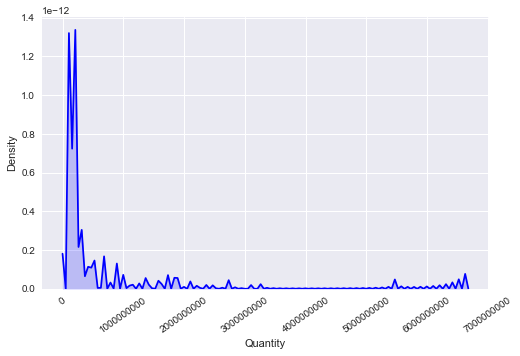

In [291]:
plt.figure(figsize=(8,5))

ax = sns.distplot(a=df_world_energy['quantity'], hist=False,
                  fit_kws=dict(color='black'), color='blue')

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1, y1, color="blue", alpha=0.2)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Quantity")
ax.set_ylabel("Density")
plt.xticks(rotation=35)
plt.grid(True)
plt.show()

## Categorical Variables

In [292]:
df_world_energy.columns.tolist()

['country_or_area',
 'commodity_transaction',
 'year',
 'unit',
 'quantity',
 'category']

In [293]:
df_world_energy['commodity_transaction'].tail()

1189477    Electricity - total wind production
1189478    Electricity - total wind production
1189479    Electricity - total wind production
1189480    Electricity - total wind production
1189481    Electricity - total wind production
Name: commodity_transaction, dtype: object

In [294]:
df_world_energy['category'].tail()

1189477    wind_electricity
1189478    wind_electricity
1189479    wind_electricity
1189480    wind_electricity
1189481    wind_electricity
Name: category, dtype: object

In [295]:
df_world_energy['country_or_area'].value_counts().head(10)

Germany          20422
United States    19847
Poland           19802
Austria          17440
Romania          17357
France           17236
Japan            17037
Czechia          16588
Italy            16312
Netherlands      15955
Name: country_or_area, dtype: int64

In [296]:
df_world_energy['commodity_transaction'].value_counts().head(20)

From combustible fuels – Main activity                                                               6601
Electricity - Gross demand                                                                           5532
Electricity - total production, main activity                                                        5523
Electricity - Own use by electricity, heat and CHP plants                                            5523
Electricity - net production                                                                         5523
Electricity - Gross production                                                                       5523
Electricity - total net installed capacity of electric power plants, main activity                   5521
Electricity - total net installed capacity of electric power plants, main activity & autoproducer    5521
Electricity - Final energy consumption                                                               5499
Electricity - Consumption by other            

In [297]:
# energies = ['oil', 'natural gas', 'coal', 'nuclear', 'hydro', 'renewables']

In [298]:
# energies_categories = df_world_energy['category'].value_counts().index.tolist()

In [299]:
# wordsLists = [x.replace('_', ' ').split() for x in energies_categories]
# words = [word for wordList in wordsLists for word in wordList]
# sorted(pd.Series(words).value_counts().index.tolist())

In [300]:
# sorted(energies_categories)

In [301]:
# new_mapping = dict()
# for category in sorted(energies_categories):
#    temp_category = category.replace('_', ' ')
#    re.findall(pattern='{}\b', string=temp_category)
#    if re.findall(pattern='{}\b', string=temp_category)
#        category = 
#        print(temp_category)

In [302]:
# re.findall(pattern='oil\b', string='other oil products n e c')
# re.findall(pattern='oil\b', string='ecial boiling poin')

In [303]:
# df_world_energy_with_mask1.head()

In [304]:
# regex1 = r'\b(Electricity|total|production$)\b'
# mask1 = df_world_energy['commodity_transaction'].str.contains(regex1)
# df_world_energy_with_mask1 = df_world_energy[mask1].copy()

In [305]:
# print(df_world_energy_with_mask1.shape)

In [306]:
# keywords = ['electricity', 'total', 'production']
# strListTest1 = ['Anthracite', '-', 'production']
# strListTest2 = ['Electricity', '-', 'total', 'wind', 'production']
# print(len([word for word in strListTest1 if word.lower() in keywords])>=len(keywords))
# print(len([word for word in strListTest2 if word.lower() in keywords])>=len(keywords))

In [307]:
# def is_containing_key_words(string, keywords=['electricity', 'total', 'production']):
#    stringList = string.lower().split()
#    words = [word for word in stringList if word.lower() in keywords]
#    if len(words) >= len(keywords):
#        res = True
#    else:
#        res = False
#    return res

In [308]:
# print(is_containing_key_words('Anthracite - production'))
# print(is_containing_key_words('Electricity - total wind production'))

In [309]:
# mask_apply = df_world_energy_with_mask1['commodity_transaction'].apply(lambda x: is_containing_key_words(x))
# df_world_energy_with_electricity = df_world_energy_with_mask1[mask_apply]

In [310]:
# df_world_energy_with_electricity['category'].value_counts()

In [311]:
# df_world_energy_with_electricity.head()

## Analysis of Energy Information Tags

In [312]:
df_world_energy[df_world_energy['category'].str.contains('electricity')].category.unique().tolist()

['electricity_net_installed_capacity_of_electric_power_plants',
 'nuclear_electricity',
 'solar_electricity',
 'thermal_electricity',
 'tide_wave_and_ocean_electricity',
 'total_electricity',
 'wind_electricity']

In [313]:
df_world_energy_electricity_total = df_world_energy[df_world_energy['category']=='total_electricity'].copy()
df_world_energy_electricity_total.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1037653,Albania,Electricity - Consumption by chemical and petr...,2014,"Kilowatt-hours, million",116.65,total_electricity
1037654,Albania,Electricity - Consumption by chemical and petr...,2013,"Kilowatt-hours, million",110.39,total_electricity
1037655,Albania,Electricity - Consumption by chemical and petr...,2012,"Kilowatt-hours, million",94.82,total_electricity
1037656,Albania,Electricity - Consumption by chemical and petr...,2011,"Kilowatt-hours, million",83.74,total_electricity
1037657,Albania,Electricity - Consumption by chemical and petr...,2010,"Kilowatt-hours, million",82.33,total_electricity


In [314]:
df_world_energy_electricity_total['commodity_transaction'].unique()

array(['Electricity - Consumption by chemical and petrochemical',
       'Electricity - Consumption by commercial and public services',
       'Electricity - Consumption by construction',
       'Electricity - Consumption by food and tobacco',
       'Electricity - Consumption by households',
       'Electricity - Consumption by iron and steel',
       'Electricity - Consumption by machinery',
       'Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption by mining and quarrying',
       'Electricity - Consumption by non-ferrous metals',
       'Electricity - Consumption by non-metallic minerals',
       'Electricity - Consumption by other',
       'Electricity - Consumption by other manuf., const. and non-fuel ind.',
       'Electricity - Consumption by paper, pulp and print',
       'Electricity - Consumption by pipeline transport',
       'Electricity - Consumption by rail',
       'Electricity - Consumption by road',
     

In [315]:
colsOfInterest = [
    'Wind – Main activity',
    'Solar – Main activity',
    'Hydro – Main activity',
    'Nuclear – Main activity',
    'Tide, wave and marine – Main activity',
    'From combustible fuels – Main activity',
    'Geothermal – Main activity',
    'Electricity - total production, main activity'
]

maskColsOfInterest = df_world_energy_electricity_total['commodity_transaction'].isin(colsOfInterest)

In [316]:
df_world_energy_electricity_total_filtered = df_world_energy_electricity_total[maskColsOfInterest].copy()

# Historical Worldwide Electricity Energy Activity

## Electricity Production per Energy

In [317]:
temp = df_world_energy_electricity_total_filtered.groupby(['year', 'commodity_transaction'])['quantity'].sum()

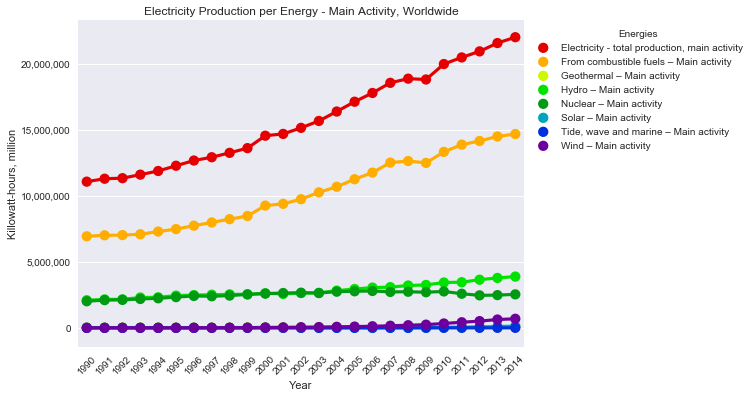

In [318]:
tempPlot = temp.reset_index()
f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(data=tempPlot, x='year', y='quantity', hue='commodity_transaction', ax=ax,
              markers='o', palette='nipy_spectral_r')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Year')
ax.set_ylabel('Killowatt-hours, million')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.legend(title='Energies',
          bbox_to_anchor=(1, 1)
         )
plt.title('Electricity Production per Energy - Main Activity, Worldwide')
plt.xticks(rotation=45)
plt.savefig('seb_image1.jpg',  bbox_inches='tight')
plt.show()

## Electricity Production per Country

In [64]:
countries = ['France', 'Russian Federation', 'United States', 'India', 'China', 'Brazil',
             'Germany', 'Japan']
maskTemp = df_world_energy_electricity_total_filtered['country_or_area'].isin(countries)
temp = df_world_energy_electricity_total_filtered[maskTemp]
temp = temp.groupby(['year', 'country_or_area'])['quantity'].sum()

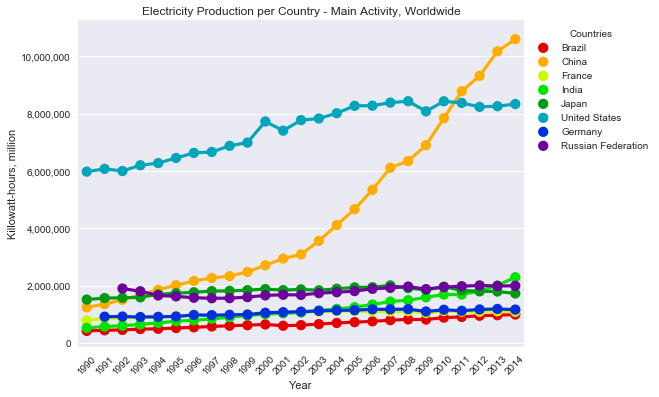

In [65]:
tempPlot = temp.reset_index()
f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(data=tempPlot, x='year', y='quantity', hue='country_or_area', ax=ax,
              markers='o', palette='nipy_spectral_r', )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Year')
ax.set_ylabel('Killowatt-hours, million')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.legend(title='Countries',
          bbox_to_anchor=(1, 1)
         )
plt.title('Electricity Production per Country - Main Activity, Worldwide')
plt.xticks(rotation=45)
plt.show()

## Electricity Production per Energy in France

In [66]:
maskTemp = df_world_energy_electricity_total_filtered['country_or_area']=='France'
temp = df_world_energy_electricity_total_filtered[maskTemp]
temp = temp.groupby(['year', 'commodity_transaction'])['quantity'].sum()

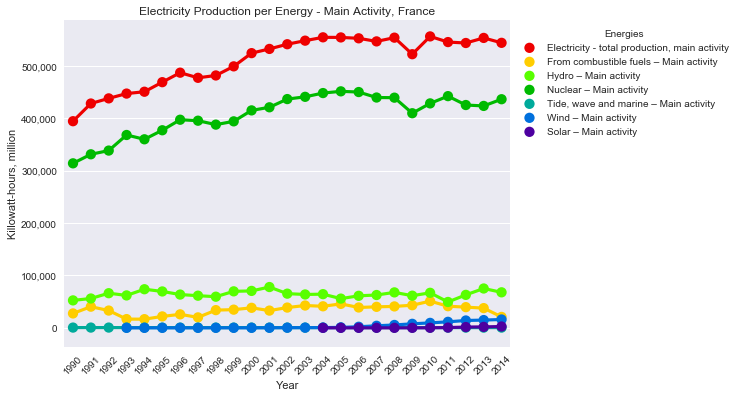

In [67]:
tempPlot = temp.reset_index()
f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(data=tempPlot, x='year', y='quantity', hue='commodity_transaction', ax=ax,
              markers='o', palette='nipy_spectral_r')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Year')
ax.set_ylabel('Killowatt-hours, million')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.legend(title='Energies',
          bbox_to_anchor=(1, 1)
         )
plt.xticks(rotation=45)
plt.title('Electricity Production per Energy - Main Activity, France')
plt.show()

# Different Choropleths of Energy Electricity Activity

## Extract ISO3 Codes From Country Names with RestCountries API

In [109]:
import requests
import json
import time
# BASE_URI = 'https://restcountries.eu/rest/v2/name/france'
BASE_URI = 'https://restcountries.eu/rest/v2/name/{}'
QUERY_SEPARATOR = ','

def get_country_list(term):
    """ Takes a resource and a search term and return a list of countries or a country.
    :param resource - resource to create the URL
    :param term - search term provided by the user of this package
    :returns - either a Country object or a list of Countries
    """
    time.sleep(0.5)
    uri = BASE_URI.format(term)
    response = requests.get(uri)
    if response.status_code == 200:
        result_list = []
        data = json.loads(response.text)  # parse json to dict
        if type(data) == list:
            for country_data in data:  # in case it is a list create python list with country instances
                result_list.append(country_data)
        return result_list
    else:
        return []

In [110]:
test = get_country_list('france')

In [111]:
test[0]['alpha3Code']

'FRA'

In [112]:
test = get_country_list('Val Verde')
test

[]

In [113]:
countries_df = df_world_energy_electricity_total['country_or_area'].drop_duplicates().reset_index(drop=False).copy()
countries_df.head()

,index,country_or_area
0,1037653,Albania
1,1037669,Algeria
2,1037694,Armenia
3,1037710,Australia
4,1037735,Austria


In [165]:
countries_df['iso3_code'] = countries_df['country_or_area'].apply(lambda x: get_country_list(x))

In [166]:
countries_df['iso3_code'].head()

0    [{'name': 'Albania', 'topLevelDomain': ['.al']...
1    [{'name': 'Algeria', 'topLevelDomain': ['.dz']...
2    [{'name': 'Armenia', 'topLevelDomain': ['.am']...
3    [{'name': 'Australia', 'topLevelDomain': ['.au...
4    [{'name': 'Austria', 'topLevelDomain': ['.at']...
Name: iso3_code, dtype: object

In [167]:
countries_df_copy = countries_df.copy()

In [168]:
def get_correct_iso3_from_rest_dict(country, xList):
    """ Not 100% efficient (can skip countries, e.g. United
    Kingdom of the British Isles ...)
    """
    res = ''
    for el in xList:
        tempName = el['name']
        tempIso3 = el['alpha3Code']
        if tempName==country:
            res = tempIso3
            # print(country, '-' ,tempName, '-', tempIso3)
    return res

In [169]:
countries_df_copy['length_iso3_results'] = countries_df_copy['iso3_code'].apply(len)

In [170]:
countries_df_copy.sort_values(by='length_iso3_results', ascending=False).head(10)

,index,country_or_area,iso3_code,length_iso3_results
133,1040824,Guinea,"[{'name': 'Equatorial Guinea', 'topLevelDomain...",4
17,1037950,China,"[{'name': 'China', 'topLevelDomain': ['.cn'], ...",3
163,1041763,Niger,"[{'name': 'Niger', 'topLevelDomain': ['.ne'], ...",2
166,1041859,Oman,"[{'name': 'Oman', 'topLevelDomain': ['.om'], '...",2
150,1041427,Mali,"[{'name': 'Mali', 'topLevelDomain': ['.ml'], '...",2
36,1038363,Ireland,"[{'name': 'Ireland', 'topLevelDomain': ['.ie']...",2
34,1038344,India,"[{'name': 'British Indian Ocean Territory', 't...",2
220,1049226,Samoa,"[{'name': 'American Samoa', 'topLevelDomain': ...",2
187,1042569,Sudan,"[{'name': 'South Sudan', 'topLevelDomain': ['....",2
83,1039336,United States,[{'name': 'United States Minor Outlying Island...,2


In [224]:
test = countries_df_copy.sort_values(by='length_iso3_results', ascending=False)
test[test.iso3_alpha_code=='']

,index,country_or_area,iso3_code,length_iso3_results,iso3_alpha_code
83,1039336,United States,[{'name': 'United States Minor Outlying Island...,2,
59,1038851,Republic of Moldova,"[{'name': 'Moldova (Republic of)', 'topLevelDo...",1,
82,1039311,United Kingdom,[{'name': 'United Kingdom of Great Britain and...,1,
71,1039087,State of Palestine,"[{'name': 'Palestine, State of', 'topLevelDoma...",1,
215,1047924,Lao People's Dem. Rep.,[],0,
239,1102749,Yemen Arab Rep. (former),[],0,
222,1050421,Wallis and Futuna Is.,[],0,
223,1053663,"Bonaire, St Eustatius, Saba",[],0,
238,1101060,Pacific Islands (former),[],0,
225,1055482,"Korea, Dem.Ppl's.Rep.",[],0,


Il y a quelques pays importants qui n'ont pas de codes ISO3 qu'on remplira à la main:

- United States
- United Kingdom
- Moldova
- Laos
- Corée du Sud
- Corée du Nord
- Czechia
- Serbie
- Iran
- Venezuela
- Bolivie
- Macédoine

In [171]:
testList = countries_df_copy[countries_df_copy.country_or_area=='China']['iso3_code'].tolist()[0]
get_correct_iso3_from_rest_dict('China', testList)

'CHN'

In [173]:
countries_df_copy['iso3_alpha_code'] = \
    countries_df_copy.apply(lambda arr: get_correct_iso3_from_rest_dict(arr['country_or_area'], arr['iso3_code']), axis=1)

In [178]:
countries_df_preprocessed = countries_df_copy[countries_df_copy['iso3_alpha_code']!=''].copy()

In [186]:
countriesWithMaps = dict(zip(countries_df_preprocessed['country_or_area'], countries_df_preprocessed['iso3_alpha_code']))

In [ ]:
countriesWithMaps["United States"] = "USA"
countriesWithMaps["Republic of Moldova"] = "MDA"
countriesWithMaps["United Kingdom"] = "GBR"
countriesWithMaps["Lao People's Dem. Rep."] = "LAO"
countriesWithMaps["Korea, Dem.Ppl's.Rep."] = "PRK"
countriesWithMaps["Czechia"] = "CZE"
countriesWithMaps["Korea, Republic of"] = "KOR"
countriesWithMaps["Serbia and Montenegro"] = "SRB"
countriesWithMaps["Venezuela (Bolivar. Rep.)"] = "VEN"
countriesWithMaps["Bolivia (Plur. State of)"] = "BOL"
countriesWithMaps["T.F.Yug.Rep. Macedonia"] = "MKD"
countriesWithMaps["Iran (Islamic Rep. of)"] = "IRN"

In [229]:
# countries_df_preprocessed[['country_or_area', 'iso3_alpha_code']].head()

In [230]:
df_world_energy_electricity_total_filtered['iso3_code'] = df_world_energy_electricity_total_filtered['country_or_area'].map(countriesWithMaps)

In [233]:
df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.iso3_code=='USA'].head()

,country_or_area,commodity_transaction,year,unit,quantity,category,iso3_code
1142424,United States,"Electricity - total production, main activity",2014,"Kilowatt-hours, million",4166530.0,total_electricity,USA
1142425,United States,"Electricity - total production, main activity",2013,"Kilowatt-hours, million",4128386.0,total_electricity,USA
1142426,United States,"Electricity - total production, main activity",2012,"Kilowatt-hours, million",4116563.0,total_electricity,USA
1142427,United States,"Electricity - total production, main activity",2011,"Kilowatt-hours, million",4185002.0,total_electricity,USA
1142428,United States,"Electricity - total production, main activity",2010,"Kilowatt-hours, million",4214470.0,total_electricity,USA


## Choropleths

### Nuclear Energy

- `Nuclear – Main activity`
- `Electricity - total production, main activity`

In [247]:
fieldOfInterest1 = 'Nuclear – Main activity'
tempNuclear = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempNuclear = tempNuclear[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest1].copy()

fieldOfInterest2 = 'Electricity - total production, main activity'
tempTotal = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempTotal = tempTotal[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest2].copy()

c:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [250]:
print(tempNuclear.shape)
print(len(tempNuclear.country_or_area.unique()))

print(tempTotal.shape)
print(len(tempTotal.country_or_area.unique()))

(31, 7)
31
(229, 7)
229


In [264]:
tempMerged = pd.merge(left=tempNuclear, right=tempTotal[['iso3_code', 'quantity']], on='iso3_code', suffixes=('_nuclear', '_total'), how='inner')
tempMerged['ratio_nuclear_total'] = tempMerged['quantity_nuclear'] / tempMerged['quantity_total']
tempMerged.dropna(inplace=True)

In [277]:
# tempMerged.sort_values('ratio_nuclear_total', ascending=False)

In [273]:
df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.iso3_code=="SWE"].groupby('commodity_transaction').sum()

,year,quantity
commodity_transaction,,
"Electricity - total production, main activity",50050,3584615.0
From combustible fuels – Main activity,50050,188032.0
Hydro – Main activity,50050,1663961.0
Nuclear – Main activity,50050,1682445.0
Solar – Main activity,44077,155.0
Wind – Main activity,50050,50022.0


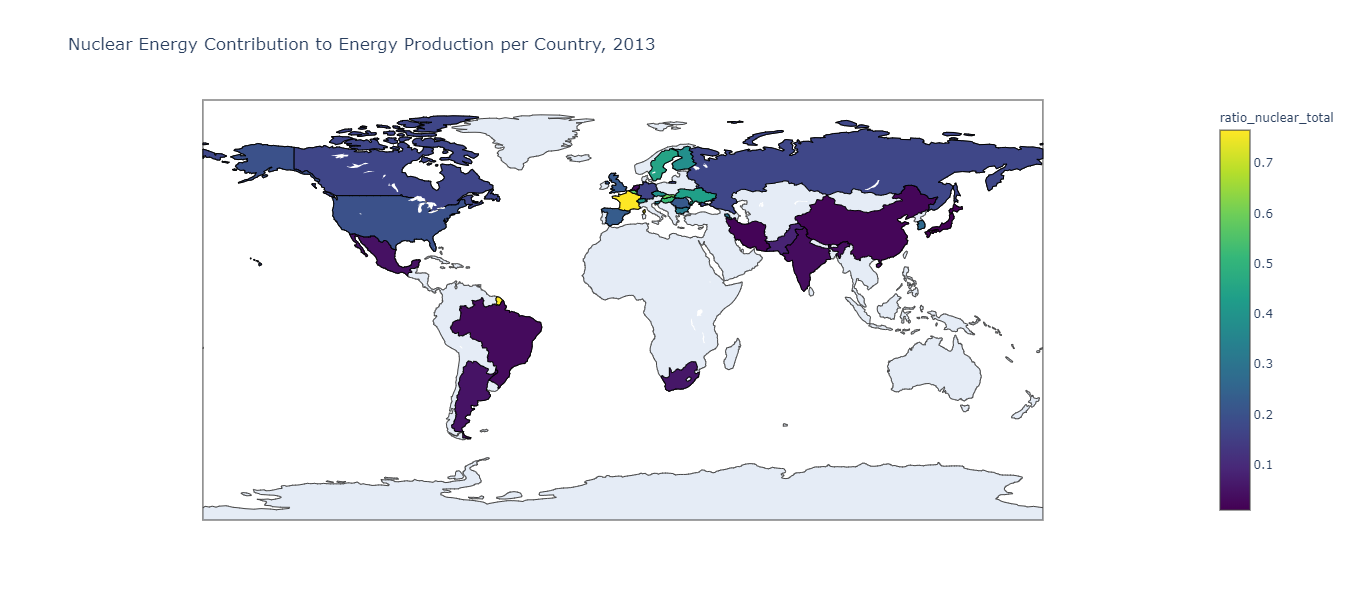

In [276]:
fig = px.choropleth(tempMerged, locations="iso3_code",
                    color="ratio_nuclear_total", # lifeExp is a column of gapminder
                    hover_name="country_or_area", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Nuclear Energy Contribution to Energy Production per Country, 2013', )
fig.show()

### Wind Energy

c:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



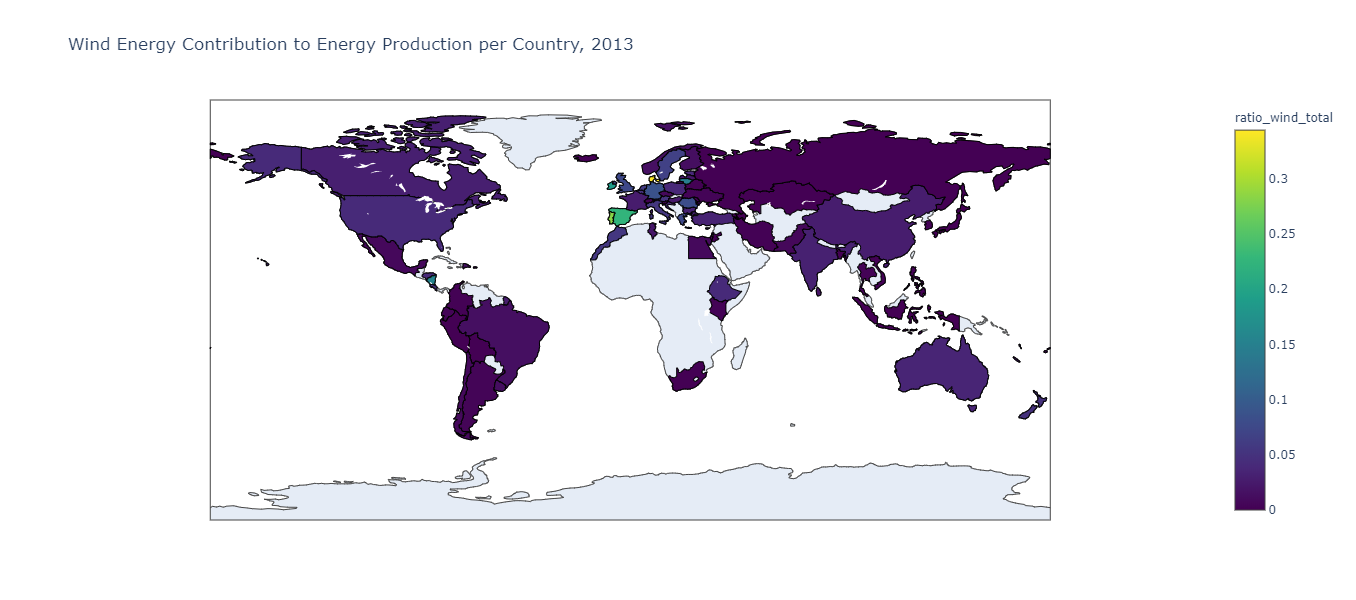

In [278]:
fieldOfInterest1 = 'Wind – Main activity'
tempWind = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempWind = tempWind[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest1].copy()

fieldOfInterest2 = 'Electricity - total production, main activity'
tempTotal = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempTotal = tempTotal[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest2].copy()

tempMerged = pd.merge(left=tempWind, right=tempTotal[['iso3_code', 'quantity']], on='iso3_code', suffixes=('_wind', '_total'), how='inner')
tempMerged['ratio_wind_total'] = tempMerged['quantity_wind'] / tempMerged['quantity_total']
tempMerged.dropna(inplace=True)

fig = px.choropleth(tempMerged, locations="iso3_code",
                    color="ratio_wind_total", # lifeExp is a column of gapminder
                    hover_name="country_or_area", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Wind Energy Contribution to Energy Production per Country, 2013')
fig.show()

### Solar Energy

c:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



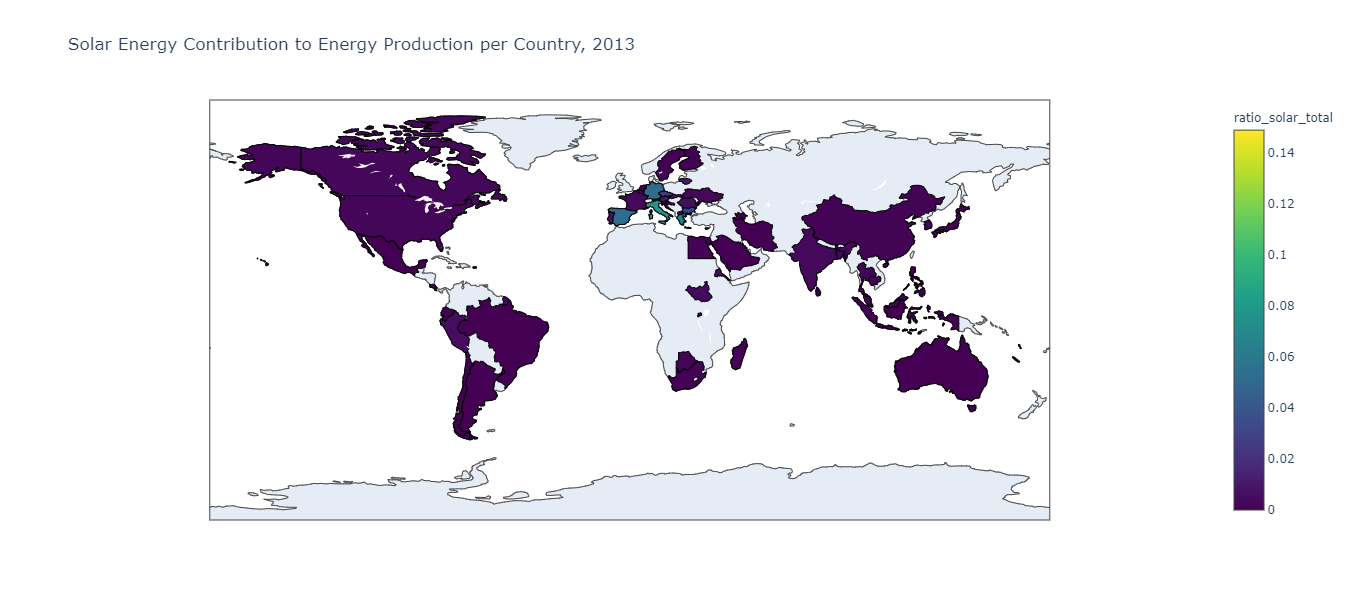

In [280]:
fieldOfInterest1 = 'Solar – Main activity'
tempSolar = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempSolar = tempSolar[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest1].copy()

fieldOfInterest2 = 'Electricity - total production, main activity'
tempTotal = df_world_energy_electricity_total_filtered[df_world_energy_electricity_total_filtered.year==2013].copy()
tempTotal = tempTotal[df_world_energy_electricity_total_filtered.commodity_transaction==fieldOfInterest2].copy()

tempMerged = pd.merge(left=tempSolar, right=tempTotal[['iso3_code', 'quantity']], on='iso3_code', suffixes=('_solar', '_total'), how='inner')
tempMerged['ratio_solar_total'] = tempMerged['quantity_solar'] / tempMerged['quantity_total']
tempMerged.dropna(inplace=True)

fig = px.choropleth(tempMerged, locations="iso3_code",
                    color="ratio_solar_total", # lifeExp is a column of gapminder
                    hover_name="country_or_area", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Solar Energy Contribution to Energy Production per Country, 2013')
fig.show()